In [ ]:
"""
@author: jahan

For more information, read [Cortez and Morais, 2007].
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
"""

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import set_option
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions
import seaborn as sns
from pandas.plotting import scatter_matrix

In [18]:
filePath = ''
filename = 'forestfires.csv'
data1 = read_csv(filePath+filename)
names = ['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
df2 = data1.drop(['month','day'], axis=1)

In [19]:
print(data1.head(5))

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [5]:
## save features as pandas dataframe for stepwise feature selection
X1 = data1.drop(['month', 'day','area'], axis = 1)
Y1 = data1.drop(data1.columns[0:12], axis = 1)
X1names = X1.columns

#scaler = StandardScaler().fit(X1)
#rescaledX = scaler.transform(X1)

In [6]:
scaler1 = StandardScaler().fit(X1)
rescaledX1 = scaler1.transform(X1)

In [7]:
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX1[0:5,:])

[[ 1.008  0.57  -0.806 -1.323 -1.83  -0.861 -1.843  0.412  1.499 -0.073]
 [ 1.008 -0.244 -0.008 -1.18   0.489 -0.51  -0.153 -0.692 -1.742 -0.073]
 [ 1.008 -0.244 -0.008 -1.05   0.561 -0.51  -0.739 -0.692 -1.518 -0.073]
 [ 1.441  1.384  0.191 -1.212 -1.898 -0.005 -1.825  3.234 -0.01   0.603]
 [ 1.441  1.384 -0.244 -0.931 -1.799  0.127 -1.291  3.356 -1.239 -0.073]]


In [28]:
# you can make a new data frame with the standardized data
dataStandDf = pd.DataFrame(rescaledX1, columns = X1names)
dataStandDf['area'] = Y1.values 

In [34]:
#let's look at the data
peek = df2.head(50)
print(peek)

    X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
0   7  5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.0
1   7  4  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.0
2   7  4  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.0
3   8  6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.0
4   8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.0
5   8  6  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0   0.0
6   8  6  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0   0.0
7   8  6  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0   0.0
8   8  6  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0   0.0
9   7  5  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0   0.0
10  7  5  92.5   88.0  698.6   7.1  17.8  51   7.2   0.0   0.0
11  7  5  92.8   73.2  713.0  22.6  19.3  38   4.0   0.0   0.0
12  6  5  63.5   70.8  665.3   0.8  17.0  72   6.7   0.0   0.0
13  6  5  90.9  126.5  686.5   7.0  21.3  42   2.2   0.0   0.0
14  6  5  92.9  133.3  699.6   9.2  26.4  21   4.5   0.

In [30]:
# descriptive statistics: mean, max, min, count, 25 percentile, 50 percentile, 75 percentile
set_option('display.width', 100)
#set_option('precision', 1)
description = df2.describe()
print(description)

           X      Y   FFMC    DMC     DC    ISI   temp     RH   wind     rain    area
count  517.0  517.0  517.0  517.0  517.0  517.0  517.0  517.0  517.0  5.2e+02   517.0
mean     4.7    4.3   90.6  110.9  547.9    9.0   18.9   44.3    4.0  2.2e-02    12.8
std      2.3    1.2    5.5   64.0  248.1    4.6    5.8   16.3    1.8  3.0e-01    63.7
min      1.0    2.0   18.7    1.1    7.9    0.0    2.2   15.0    0.4  0.0e+00     0.0
25%      3.0    4.0   90.2   68.6  437.7    6.5   15.5   33.0    2.7  0.0e+00     0.0
50%      4.0    4.0   91.6  108.3  664.2    8.4   19.3   42.0    4.0  0.0e+00     0.5
75%      7.0    5.0   92.9  142.4  713.9   10.8   22.8   53.0    4.9  0.0e+00     6.6
max      9.0    9.0   96.2  291.3  860.6   56.1   33.3  100.0    9.4  6.4e+00  1090.8


In [31]:
# show descriptive stats after standardization
set_option('display.width', 100)
set_option('display.precision', 1)
descriptionStand = dataStandDf.describe()
print(descriptionStand)

             X        Y     FFMC      DMC       DC      ISI     temp       RH     wind     rain  \
count  5.2e+02  5.2e+02  5.2e+02  5.2e+02  5.2e+02  5.2e+02  5.2e+02  5.2e+02  5.2e+02  5.2e+02   
mean   2.1e-16  2.6e-16 -1.8e-15 -2.7e-17  6.9e-17  1.0e-17  2.5e-16  2.2e-16 -4.2e-16 -6.9e-18   
std    1.0e+00  1.0e+00  1.0e+00  1.0e+00  1.0e+00  1.0e+00  1.0e+00  1.0e+00  1.0e+00  1.0e+00   
min   -1.6e+00 -1.9e+00 -1.3e+01 -1.7e+00 -2.2e+00 -2.0e+00 -2.9e+00 -1.8e+00 -2.0e+00 -7.3e-02   
25%   -7.2e-01 -2.4e-01 -8.1e-02 -6.6e-01 -4.4e-01 -5.5e-01 -5.8e-01 -6.9e-01 -7.4e-01 -7.3e-02   
50%   -2.9e-01 -2.4e-01  1.7e-01 -4.0e-02  4.7e-01 -1.4e-01  7.1e-02 -1.4e-01 -9.8e-03 -7.3e-02   
75%    1.0e+00  5.7e-01  4.1e-01  4.9e-01  6.7e-01  3.9e-01  6.7e-01  5.3e-01  4.9e-01 -7.3e-02   
max    1.9e+00  3.8e+00  1.0e+00  2.8e+00  1.3e+00  1.0e+01  2.5e+00  3.4e+00  3.0e+00  2.2e+01   

         area  
count   517.0  
mean     12.8  
std      63.7  
min       0.0  
25%       0.0  
50%       0.

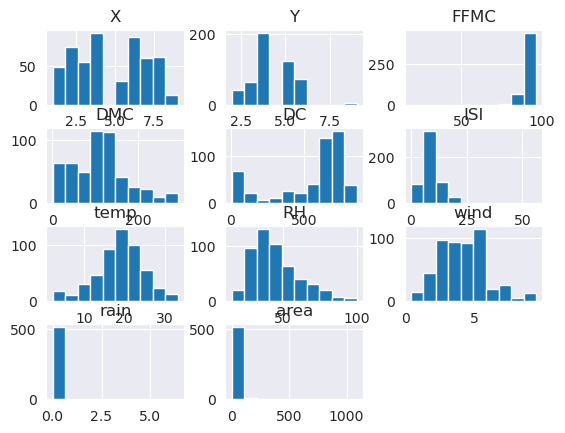

In [32]:
# we look at the distribution of data and its descriptive statistics
df2.hist()
plt.show()

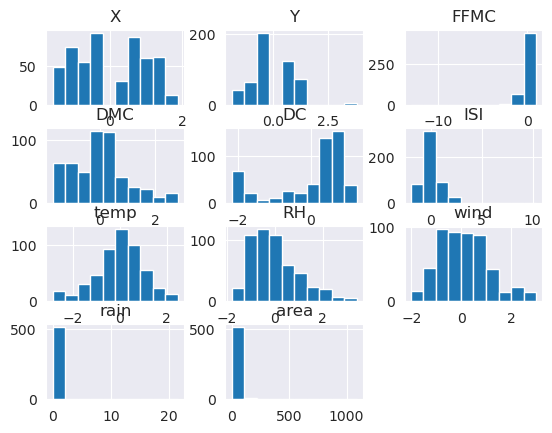

In [33]:
# Now plot the histogram after standardization
dataStandDf.hist()
plt.show()

In [35]:
# separate array into input and output components
scaler = Normalizer().fit(X1)
normalizedX = scaler.transform(X1)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.05  0.036 0.612 0.186 0.67  0.036 0.058 0.362 0.048 0.   ]
 [0.01  0.006 0.134 0.052 0.988 0.01  0.027 0.049 0.001 0.   ]
 [0.01  0.006 0.13  0.063 0.988 0.01  0.021 0.047 0.002 0.   ]
 [0.05  0.038 0.578 0.21  0.488 0.057 0.052 0.611 0.025 0.001]
 [0.045 0.034 0.506 0.291 0.579 0.054 0.065 0.561 0.01  0.   ]]


In [36]:
# you can make a new data frame with the normalized data
dataNormDf = pd.DataFrame(normalizedX, columns = X1names)
dataNormDf['area'] = Y1.values 

In [37]:
# show descriptive stats after normalization
set_option('display.width', 100)
set_option('display.precision', 1)
descriptionNorm = dataNormDf.describe()
print(descriptionNorm)

             X        Y     FFMC      DMC       DC      ISI     temp       RH     wind     rain  \
count  5.2e+02  5.2e+02  5.2e+02  5.2e+02  5.2e+02  5.2e+02  5.2e+02  5.2e+02  5.2e+02  5.2e+02   
mean   1.3e-02  1.2e-02  2.4e-01  1.9e-01  8.8e-01  2.1e-02  4.3e-02  1.2e-01  1.2e-02  3.2e-05   
std    1.4e-02  1.2e-02  2.2e-01  7.8e-02  1.9e-01  1.9e-02  3.1e-02  1.3e-01  1.4e-02  4.2e-04   
min    1.1e-03  2.4e-03  7.1e-02  5.5e-03  7.0e-02  0.0e+00  6.0e-03  2.1e-02  5.8e-04  0.0e+00   
25%    4.3e-03  5.3e-03  1.2e-01  1.4e-01  9.4e-01  1.0e-02  2.6e-02  5.2e-02  4.1e-03  0.0e+00   
50%    8.0e-03  6.7e-03  1.3e-01  1.9e-01  9.6e-01  1.4e-02  3.2e-02  6.7e-02  6.4e-03  0.0e+00   
75%    1.3e-02  1.0e-02  2.0e-01  2.4e-01  9.8e-01  2.4e-02  4.5e-02  1.1e-01  1.0e-02  0.0e+00   
max    8.3e-02  8.3e-02  9.2e-01  4.1e-01  9.9e-01  2.2e-01  2.3e-01  7.3e-01  9.1e-02  9.1e-03   

         area  
count   517.0  
mean     12.8  
std      63.7  
min       0.0  
25%       0.0  
50%       0.

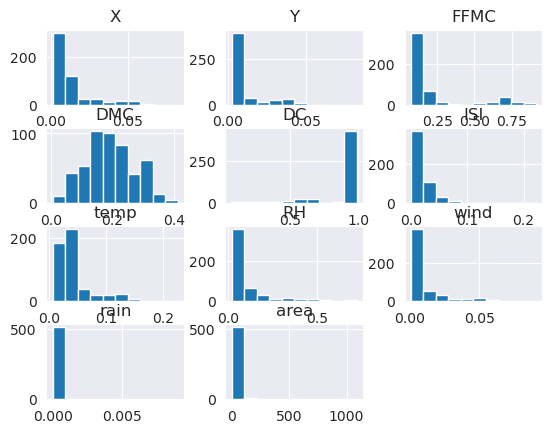

In [38]:
# we look at the distribution of data and its descriptive statistics
dataNormDf.hist()
plt.show()

            X        Y     FFMC      DMC       DC      ISI     temp       RH     wind     rain  \
X     1.0e+00  5.4e-01 -2.1e-02 -4.8e-02 -8.6e-02  6.2e-03 -5.1e-02  8.5e-02  1.9e-02  6.5e-02   
Y     5.4e-01  1.0e+00 -4.6e-02  7.8e-03 -1.0e-01 -2.4e-02 -2.4e-02  6.2e-02 -2.0e-02  3.3e-02   
FFMC -2.1e-02 -4.6e-02  1.0e+00  3.8e-01  3.3e-01  5.3e-01  4.3e-01 -3.0e-01 -2.8e-02  5.7e-02   
DMC  -4.8e-02  7.8e-03  3.8e-01  1.0e+00  6.8e-01  3.1e-01  4.7e-01  7.4e-02 -1.1e-01  7.5e-02   
DC   -8.6e-02 -1.0e-01  3.3e-01  6.8e-01  1.0e+00  2.3e-01  5.0e-01 -3.9e-02 -2.0e-01  3.6e-02   
ISI   6.2e-03 -2.4e-02  5.3e-01  3.1e-01  2.3e-01  1.0e+00  3.9e-01 -1.3e-01  1.1e-01  6.8e-02   
temp -5.1e-02 -2.4e-02  4.3e-01  4.7e-01  5.0e-01  3.9e-01  1.0e+00 -5.3e-01 -2.3e-01  6.9e-02   
RH    8.5e-02  6.2e-02 -3.0e-01  7.4e-02 -3.9e-02 -1.3e-01 -5.3e-01  1.0e+00  6.9e-02  1.0e-01   
wind  1.9e-02 -2.0e-02 -2.8e-02 -1.1e-01 -2.0e-01  1.1e-01 -2.3e-01  6.9e-02  1.0e+00  6.1e-02   
rain  6.5e-02  3.3e-

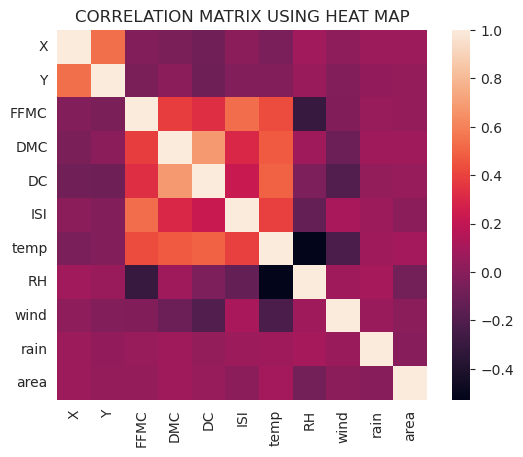

<Figure size 640x480 with 0 Axes>

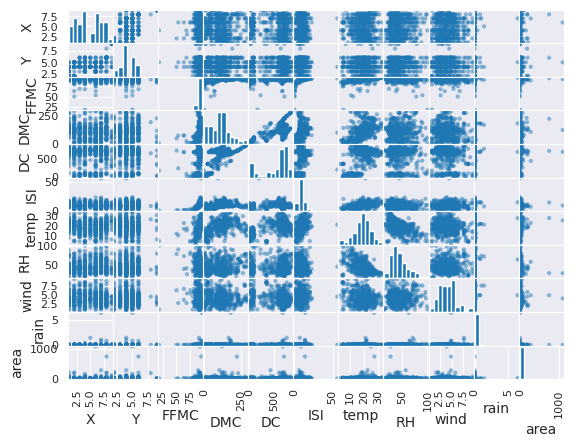

In [40]:
# correlation heat map, pay attention to correlation between all predicators/features and each predictor and the output
plt.figure() # new plot
corMat = df2.corr(method='pearson')
print(corMat)
## plot correlation matrix as a heat map
sns.heatmap(corMat, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title("CORRELATION MATRIX USING HEAT MAP")
plt.show()
#
## scatter plot of all data
plt.figure()
scatter_matrix(data1)
plt.show()